V zadnji nalogi so se kolesarji pomerili v neki dirki na izpadanje. Problem vseh tekem na izpadanje je, da na koncu vemo le, da je zmagovalec boljši od ostalih, ne pa tudi, v kakšnem vrstnem redu bi končali tekmo ostali, če ne bi izpadli.

V neki dirki so sodelovale Jana, Tina, Berta, Dani, Greta, Liza in Micka. Zmagala je Jana, torej lahko vemo, da je hitrejša od njih. V neki drugi so bile Liza, Olga, Rezka in Vera. Zmagala je Liza. Potem lahko vemo ne le, da je Liza hitrejša od Rezke, temveč tudi, da je Jana hitrejša od Rezke (saj je hitrejša od Olge, ki je hitrejša od Rezka).

## Obvezna naloga

Napiši funkcijo `hitrejsi(kolesar1, kolesar2, razmerja)`, prejme imeni dveh kolesarjev in vrne ime hitrejšega od njiju. Če ni znano, kdo je hitrejši, pa vrne `None`. Klic `hitrejsi("Olga", "Dani", razmerja)` vrne Dani, ker je Dani hitrejša od Cilke in ta od Olge. Klic `hitrejsi("Berta", "Micka")` vrne `None`, ker ne obstaja pot ne od Berte do Micke ne obratno.

**Najtoplejše priporočilo: ta funkcija najbrž ne bo rekurzivna.** Pač pa si napiši drugo, pomožno funkcijo, ki bo rekurzivna in ki jo bo funkcija `hitrejsi` poklicala dvakrat. (Prvič zato, da preveri, ali je prvi hitrejši od drugega. Drugič zato, da preveri, ali je morda obratno.)

Kdor želi, pa lahko najprej reši dodatno nalogo in napisano funkcijo uporabi v obvezni nalogi.

Argument `razmerja` je slovar, katerega ključi so imena kolesarjev, pripadajoče vrednosti pa imena tistih, od katerih je ta kolesar preverjeno hitrejši. Tako ključu "Ana" pripada množica `{"Tina", "Berta", "Dani", "Greta", "Liza", "Micka"}`. Kot ključi nastopajo vsi kolesarji, tudi tisti, ki niso hitrejši od nikogar. V testih se bo pojavljal slovar, ki predstavlja stanje na sliki, pa tudi drugačni slovarji.

## Dodatna naloga

Napiši funkcijo `dokazov(kolesar1, kolesar2, razmerja)`, ki vrne število dokazov, da je `kolesar1` hitrejši kot `kolesar2`.

- Klic `dokazov("Jana", "Cilka", razmerja)` vrne 4. Da je Jana hitrejša od Cilke lahko dokažemo z zaporedjem Jana - Berta - Cilka, Jana - Dani - Ana - Cilka, Jana - Dani - Cilka in Jana - Dani - Fanči - Cilka.

- Klic `dokazov("Dani", "Liza", razmerja)` vrne 3, saj imamo poti Dani - Fanči - Liza, Dani - Liza in Dani - Micka - Liza.

Če `kolesar1` ni hitrejši kot `kolesar2` (ker razmerje ni znano ali pa je celo počasnejši) funkcija vrne `0`.

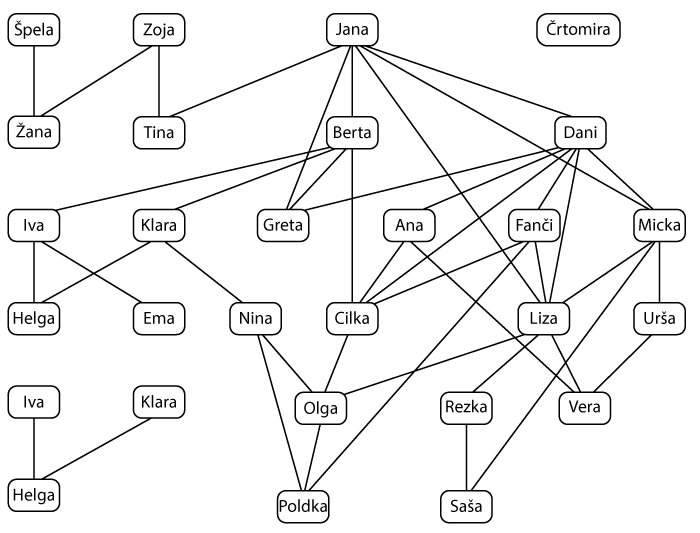

In [1]:
razmerja = {'Ana': {'Vera', 'Cilka'},
            'Berta': {'Greta', 'Klara', 'Iva', 'Cilka'},
            'Cilka': {'Olga'},
            'Črtomira': set(),
            'Dani': {'Liza', 'Ana', 'Fanči', 'Cilka', 'Micka', 'Greta'},
            'Ema': set(),
            'Fanči': {'Liza', 'Poldka', 'Cilka'},
            'Greta': set(),
            'Helga': set(),
            'Iva': {'Ema', 'Helga'},
            'Jana': {'Liza', 'Dani', 'Berta', 'Micka', 'Tina', 'Greta'},
            'Klara': {'Helga', 'Nina'},
            'Liza': {'Vera', 'Olga', 'Rezka'},
            'Micka': {'Liza', 'Saša', 'Urša'},
            'Nina': {'Olga', 'Poldka'},
            'Olga': {'Poldka'},
            'Poldka': set(),
            'Rezka': {'Saša'},
            'Saša': set(),
            'Špela': {'Žana'},
            'Tina': set(),
            'Urša': {'Vera'},
            'Vera': set(),
            'Zoja': {'Žana', 'Tina'},
            'Žana': set()}

## Rešitev

### Obvezna naloga

Ubogajmo nasvet: napišimo pomožno funkcijo `je_hitrejsi(kolesar1, kolesar2, razmerja)`, ki bo vrnila `True`, če je `kolesar1` hitrejši kot `kolesar2`.

Ta bo preprosta: `kolesar1` je hitrejši kot `kolesar2`, če ga je premagal neposredno (`kolesar2 in razmerja[kolesar1]`, ali pa je `kolesar1` premagal nekega kolesarja, ki je hitrejši kot `kolesar2`.

In [2]:
def je_hitrejsi(kolesar1, kolesar2, razmerja):
    if kolesar2 in razmerja[kolesar1]:
        return True
    for kolesar3 in razmerja[kolesar1]:
        if je_hitrejsi(kolesar3, kolesar2, razmerja):
            return True
    return False

Gre tudi krajše:

In [3]:
def je_hitrejsi(kolesar1, kolesar2, razmerja):
    return kolesar2 in razmerja[kolesar1] \
        or any(je_hitrejsi(kolesar3, kolesar2, razmerja)
               for kolesar3 in razmerja[kolesar1])

Rešitev naloge je potem

In [4]:
def hitrejsi(kolesar1, kolesar2, razmerja):
    if je_hitrejsi(kolesar1, kolesar2, razmerja):
        return kolesar1
    if je_hitrejsi(kolesar2, kolesar1, razmerja):
        return kolesar2
    return None

Tule tudi Pythonov ternarni operator ne izpade preveč grozno. Pravzaprav izpade skoraj pregledno.

In [5]:
def hitrejsi(kolesar1, kolesar2, razmerja):
    return kolesar1 if je_hitrejsi(kolesar1, kolesar2, razmerja) \
        else kolesar2 if je_hitrejsi(kolesar2, kolesar1, razmerja) \
        else None

Če postavimo funkcijo `je_hitrejsi` znotraj funkcije `hitrejsi`, se izognemo še kakemu argumentu `razmerja`.

In [6]:
def hitrejsi(kolesar1, kolesar2, razmerja):
    def je_hitrejsi(kdo, koga):
        return koga in razmerja[kdo] \
            or any(je_hitrejsi(kolesar, koga) for kolesar in razmerja[kdo])

    return kolesar1 if je_hitrejsi(kolesar1, kolesar2) \
        else kolesar2 if je_hitrejsi(kolesar2, kolesar1) \
        else None

Pravzaprav mi je bilo prej bolj všeč. :)

### Dodatna naloga

Če je `kolesar2 in razmerja[kolesar1]`, je to že prvi dokaz. To je `True` ali `False`, torej `1` ali `0`. Če bi radi bili bolj papeški, dodamo še `int`, da bo res `1` ali `0`: torej, `int(kolesar2 in razmerja[kolesar1])`.

Nato gremo čez vse kolesarje, ki jih je premagal `kolesar1` in jih povprašamo, koliko dokazov imajo, da so hitrejši kot `kolesar2`. To seštejemo: toliko je poti od `kolesar1` do `kolesar2`. 

In [8]:
def dokazov(kolesar1, kolesar2, razmerja):
    return (kolesar2 in razmerja[kolesar1]) \
           + sum(dokazov(kolesar3, kolesar2, razmerja)
                 for kolesar3 in razmerja[kolesar1])

### Obvezna naloga po dodatni

Če najprej rešimo dodatno, lahko z njo rešimo obvezno. Namesto da bi napisali funkcijo `je_hitrejsi`, kličemo kar funkcijo `dokazov`. Njen rezultat bo različen od `0` - torej resničen - natanko takrat, ko obstaja kak dokaz, da je en kolesar hitrejši od drugega.

In [9]:
def hitrejsi(kolesar1, kolesar2, razmerja):
    return kolesar1 if dokazov(kolesar1, kolesar2, razmerja) \
        else kolesar2 if dokazov(kolesar2, kolesar1, razmerja) \
        else None